In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
    
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

input_file = ''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        input_file = os.path.join(dirname, filename)
        print(input_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-grade-prediction/student-mat.csv


## **Important Libraries**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# moore libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Label Encoding
from sklearn.preprocessing import LabelEncoder

## Import and Pre-process Data 

In [19]:
data = pd.read_csv(input_file)
original_data = data.copy() # needed for later

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Visualizing data

### **1. Non numeric data using count plot**

In [21]:
non_numeric_columns = ['sex', 'activities','address','famsup','Mjob', 'Fjob', 
                       'school', 'nursery', 'Pstatus', 'paid','guardian', 'famsize', 
                       'schoolsup', 'reason', 'higher', 'internet', 'romantic',
                       ]

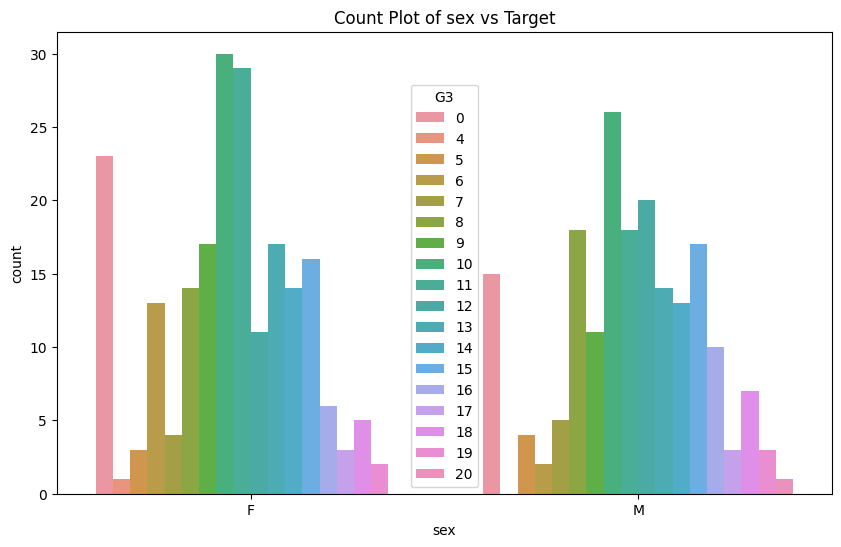

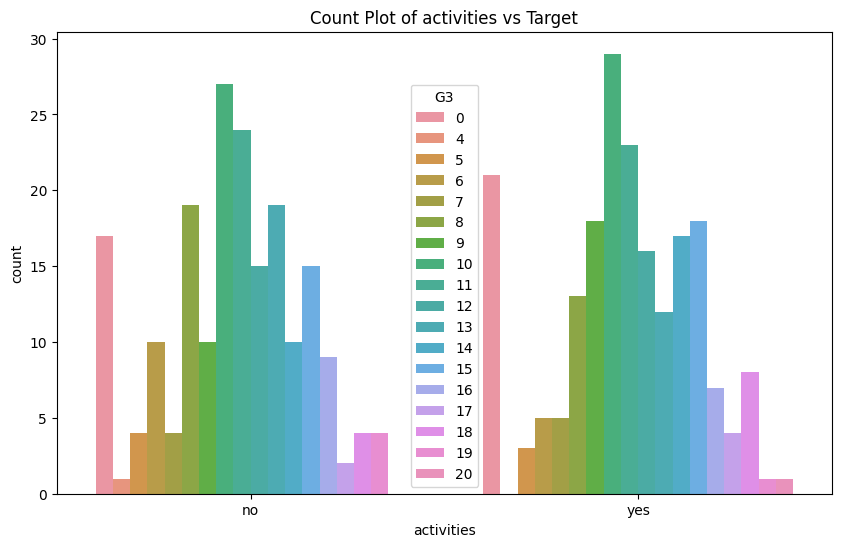

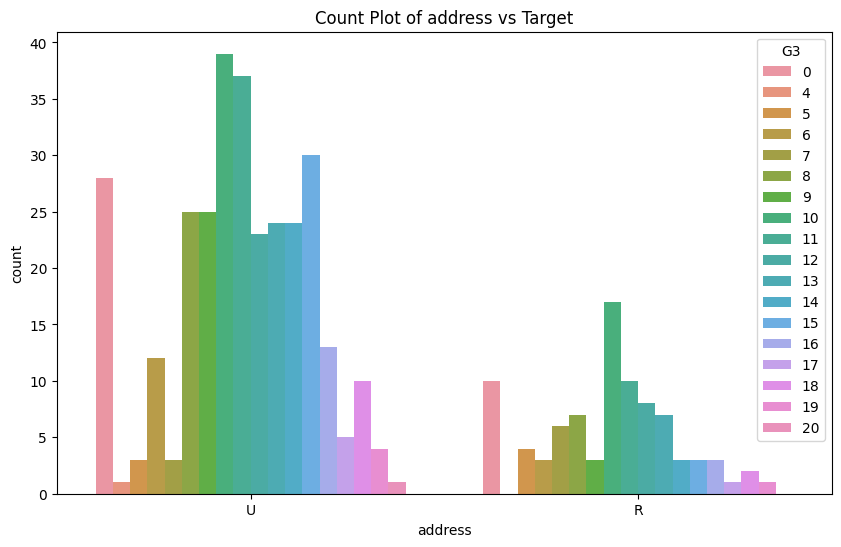

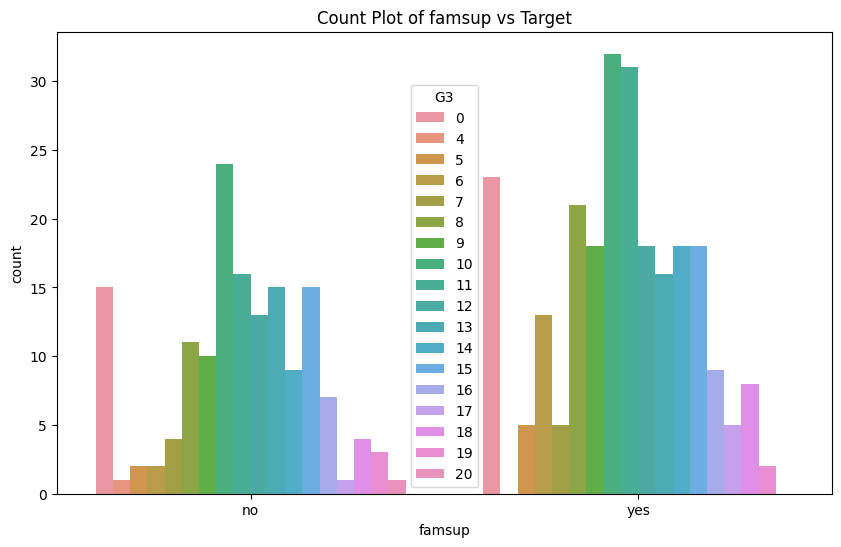

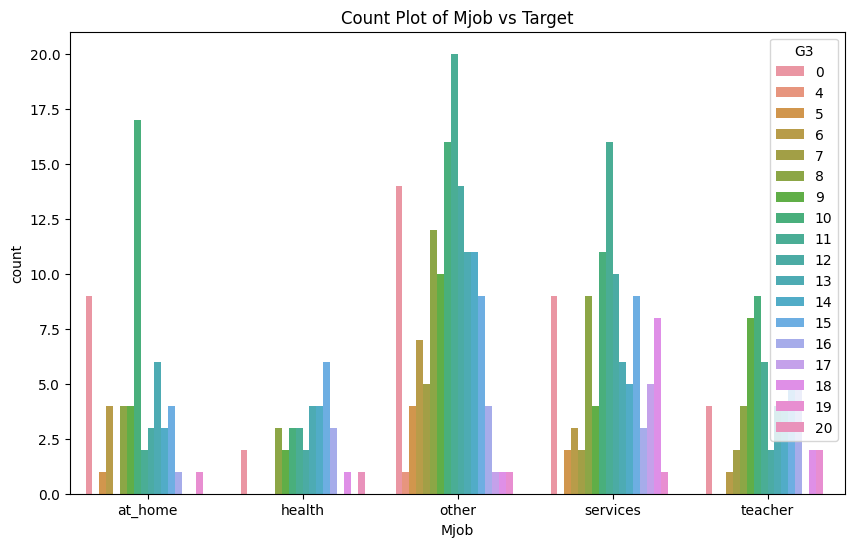

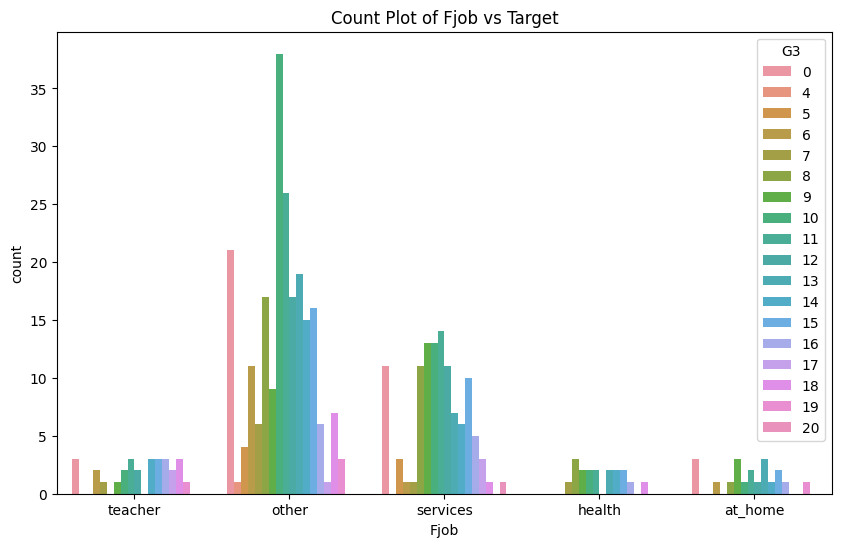

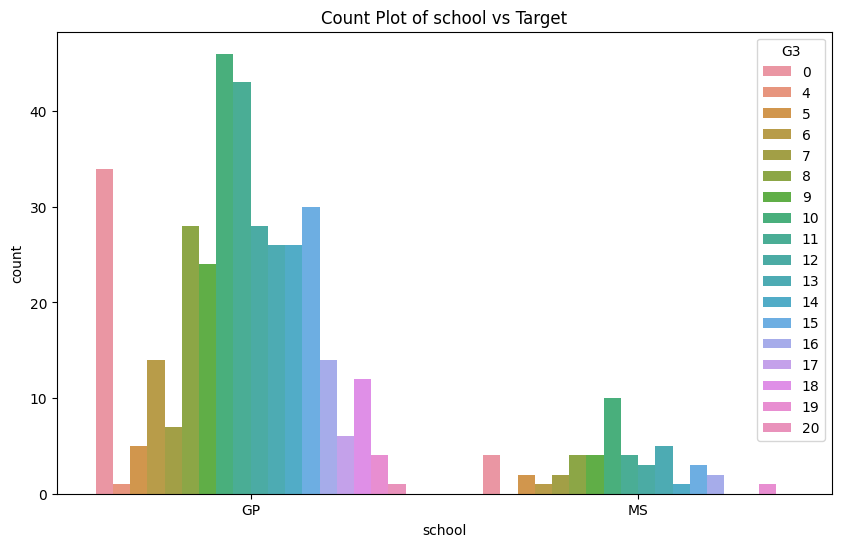

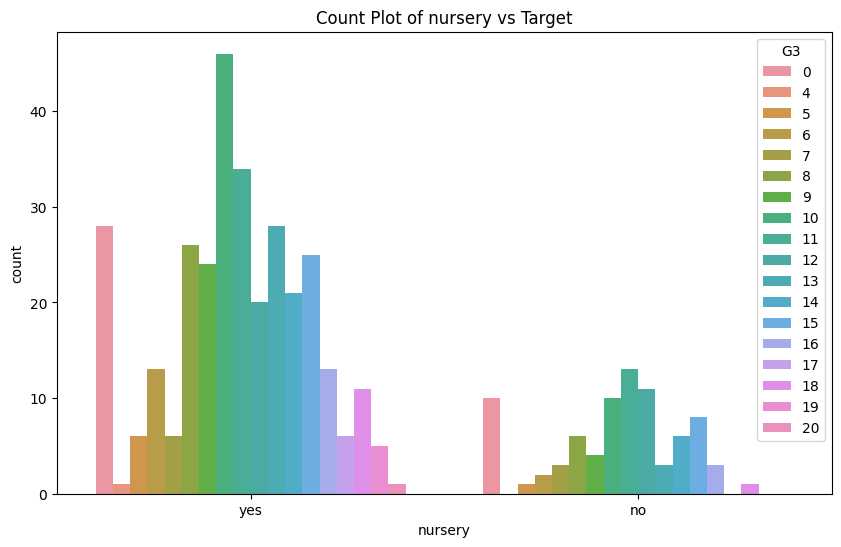

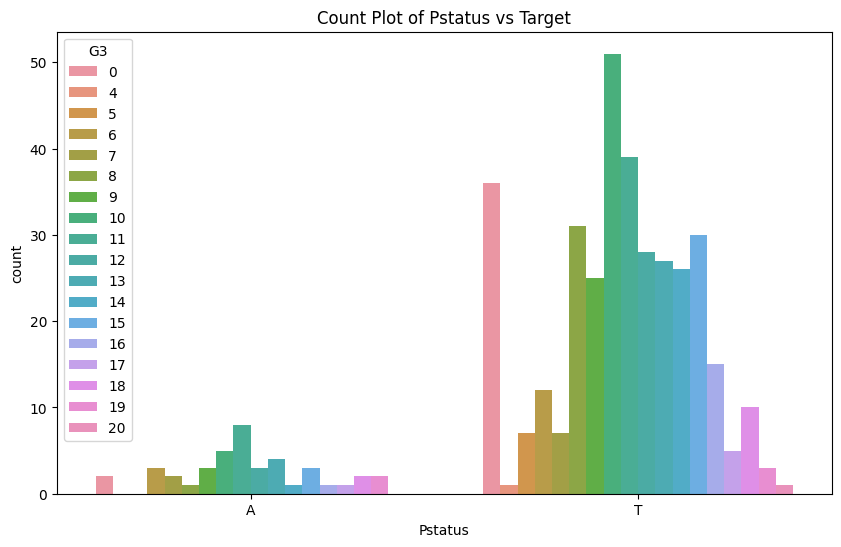

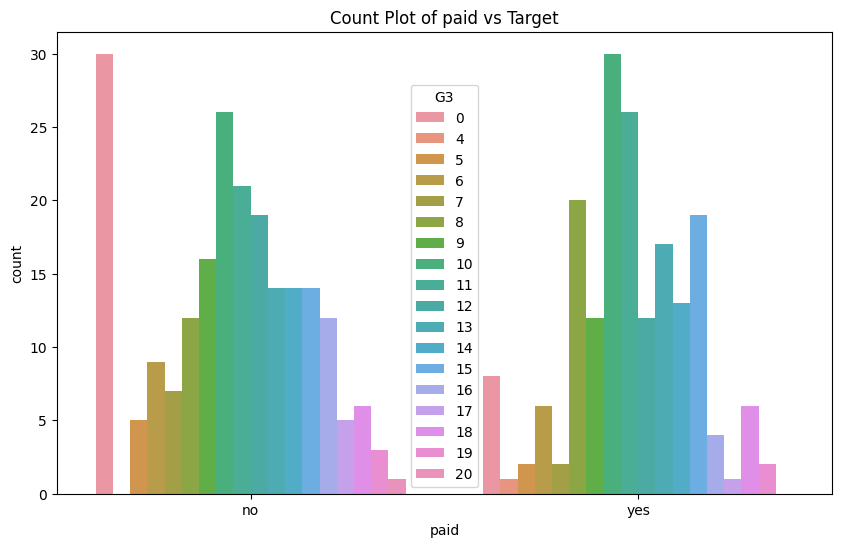

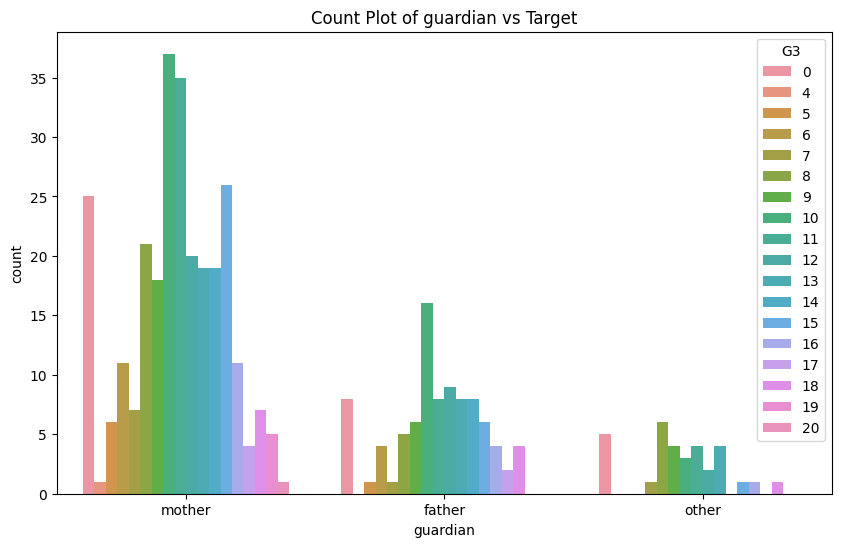

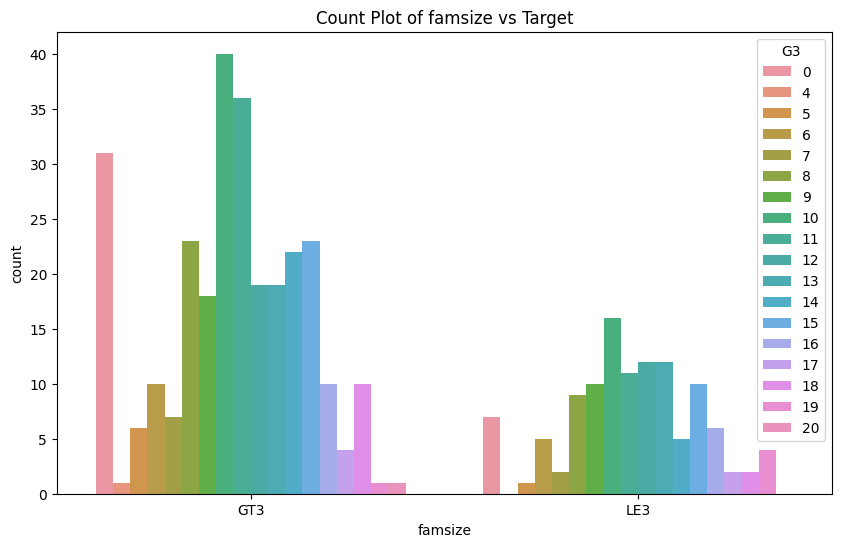

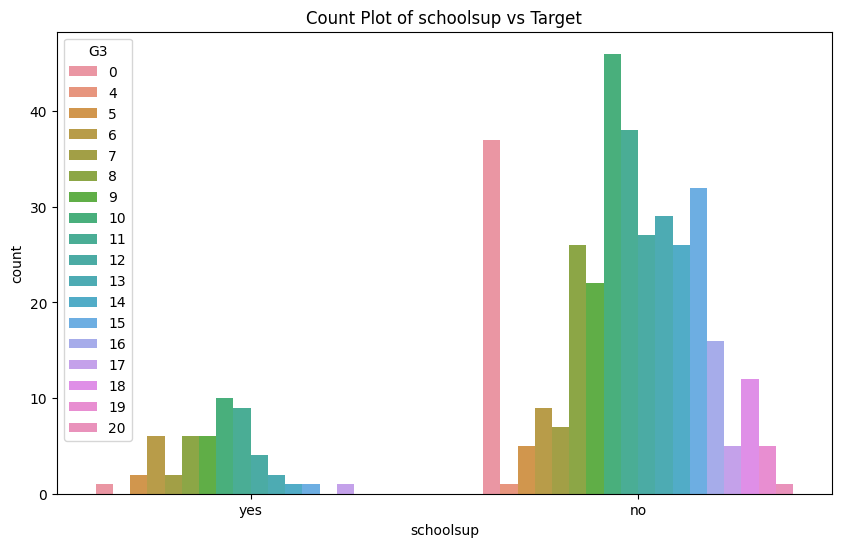

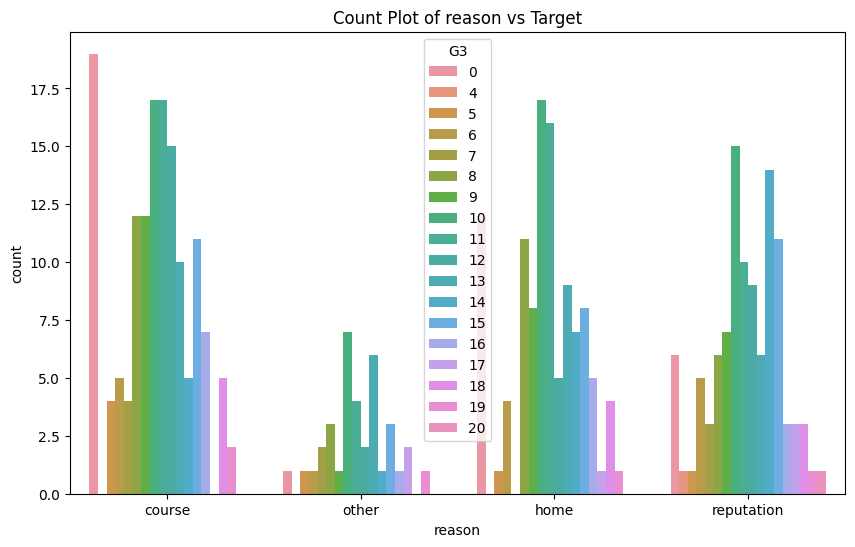

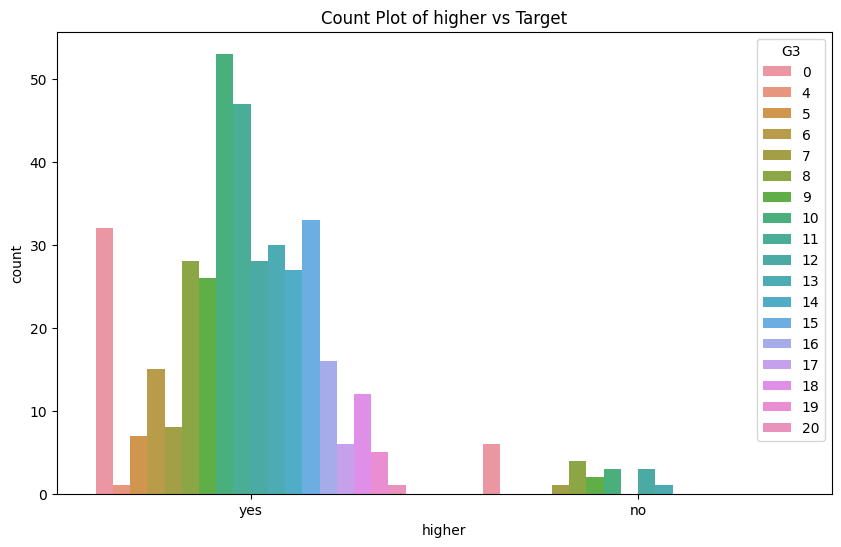

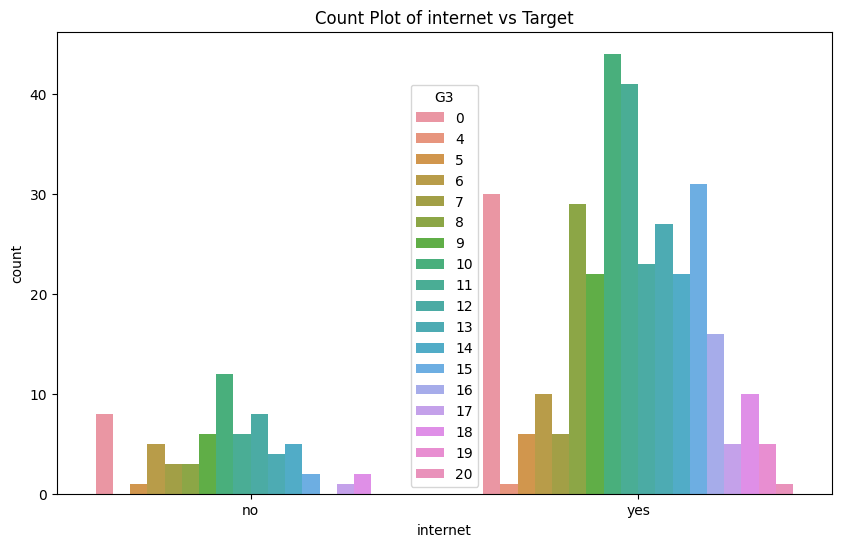

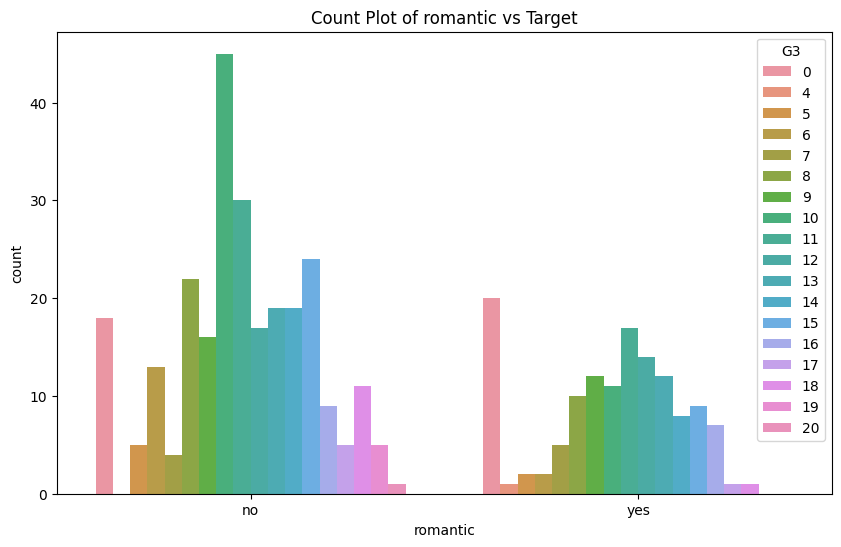

In [22]:
for col in non_numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='G3', data=data)
    plt.title(f'Count Plot of {col} vs Target')
    plt.show()

In these plots we see that the non-numeric features are each encoded to categories with numeric values, and there are bell (gaussian) curves for each categories

The bell curves show the frequency distribution of final grade `G3` for each category.

If the width and height of the curves are almost the same for each category for a given feature, then we can assume that that feature is not correlated with target feature and therefore does not affect the target attribute much. But if one or more of the curves are very high or wide while one or more others are very low or narrow, then we can safely assume that feature has a strong correlation with the target feature and therefore affects it greatly.

In this light, we can assume the following two features have lower correlation with target attribute `G3`, and thus we can safely drop them from our dataframe:
- activities
- paid

therefore let's remove them.

In [23]:
data = data.drop(columns=['activities', 'paid'], axis=1)

### **Encoding non-numeric values**

**We will use label encoding technique**

In [24]:
non_numeric_columns.remove('activities')
non_numeric_columns.remove('paid')
label_encoder = LabelEncoder()
data_label_encoded = data.copy()
for column in non_numeric_columns:
    data_label_encoded[column] = label_encoder.fit_transform(data_label_encoded[column])

print("\nLabel Encoded Data:")
print(data_label_encoded.head())


Label Encoded Data:
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 31 columns]


In [25]:
data = data_label_encoded

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  nursery     395 non-null    int64
 18  higher      395 non-null    int64
 19  internet    395 non-null    int64
 20  romantic    395 non-null    int6

### **2. Numeric data using correlations and scatter plot**

### Use Scatter plot of individual features

In [26]:
data_numeric_only = data.drop(columns=non_numeric_columns, axis=1)
data_numeric_only.columns



Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

## **Range values of numeric data columns**

Needed for later

In [27]:
#data_ranges = data_numeric_only.max() - data_numeric_only.min()


data_numeric_only.max()
data_numeric_only.min()

data_ranges = {}

for col in data_numeric_only:
    data_ranges[col] = {'max': data_numeric_only[col].max(), 'min': data_numeric_only[col].min()}
    
data_ranges



{'age': {'max': 22, 'min': 15},
 'Medu': {'max': 4, 'min': 0},
 'Fedu': {'max': 4, 'min': 0},
 'traveltime': {'max': 4, 'min': 1},
 'studytime': {'max': 4, 'min': 1},
 'failures': {'max': 3, 'min': 0},
 'famrel': {'max': 5, 'min': 1},
 'freetime': {'max': 5, 'min': 1},
 'goout': {'max': 5, 'min': 1},
 'Dalc': {'max': 5, 'min': 1},
 'Walc': {'max': 5, 'min': 1},
 'health': {'max': 5, 'min': 1},
 'absences': {'max': 75, 'min': 0},
 'G1': {'max': 19, 'min': 3},
 'G2': {'max': 19, 'min': 0},
 'G3': {'max': 20, 'min': 0}}

## **Correlations of numeric values with target attribute**

In [28]:
correlations = data_numeric_only.drop(columns=['G3']).corrwith(data_numeric_only['G3'])
correlations


age          -0.161579
Medu          0.217147
Fedu          0.152457
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
dtype: float64

### Show top k features with highest correlation with target attribute (G3)

Let's chose `k = 6`

therefore 6 largest correlations

In [29]:
# Select top 6 features with highest correlation with G3
# G3 is excluded from the correlation calculation
correlations = data_numeric_only.drop(columns=['G3']).corrwith(data_numeric_only['G3'])

# Select top-k features (excluding G3) with highest absolute correlation coefficients
top_k_features = correlations.abs().nlargest(6)
print(top_k_features)

G2          0.904868
G1          0.801468
failures    0.360415
Medu        0.217147
age         0.161579
Fedu        0.152457
dtype: float64


### Plot Scatter plots of the 6 attributes against target variable

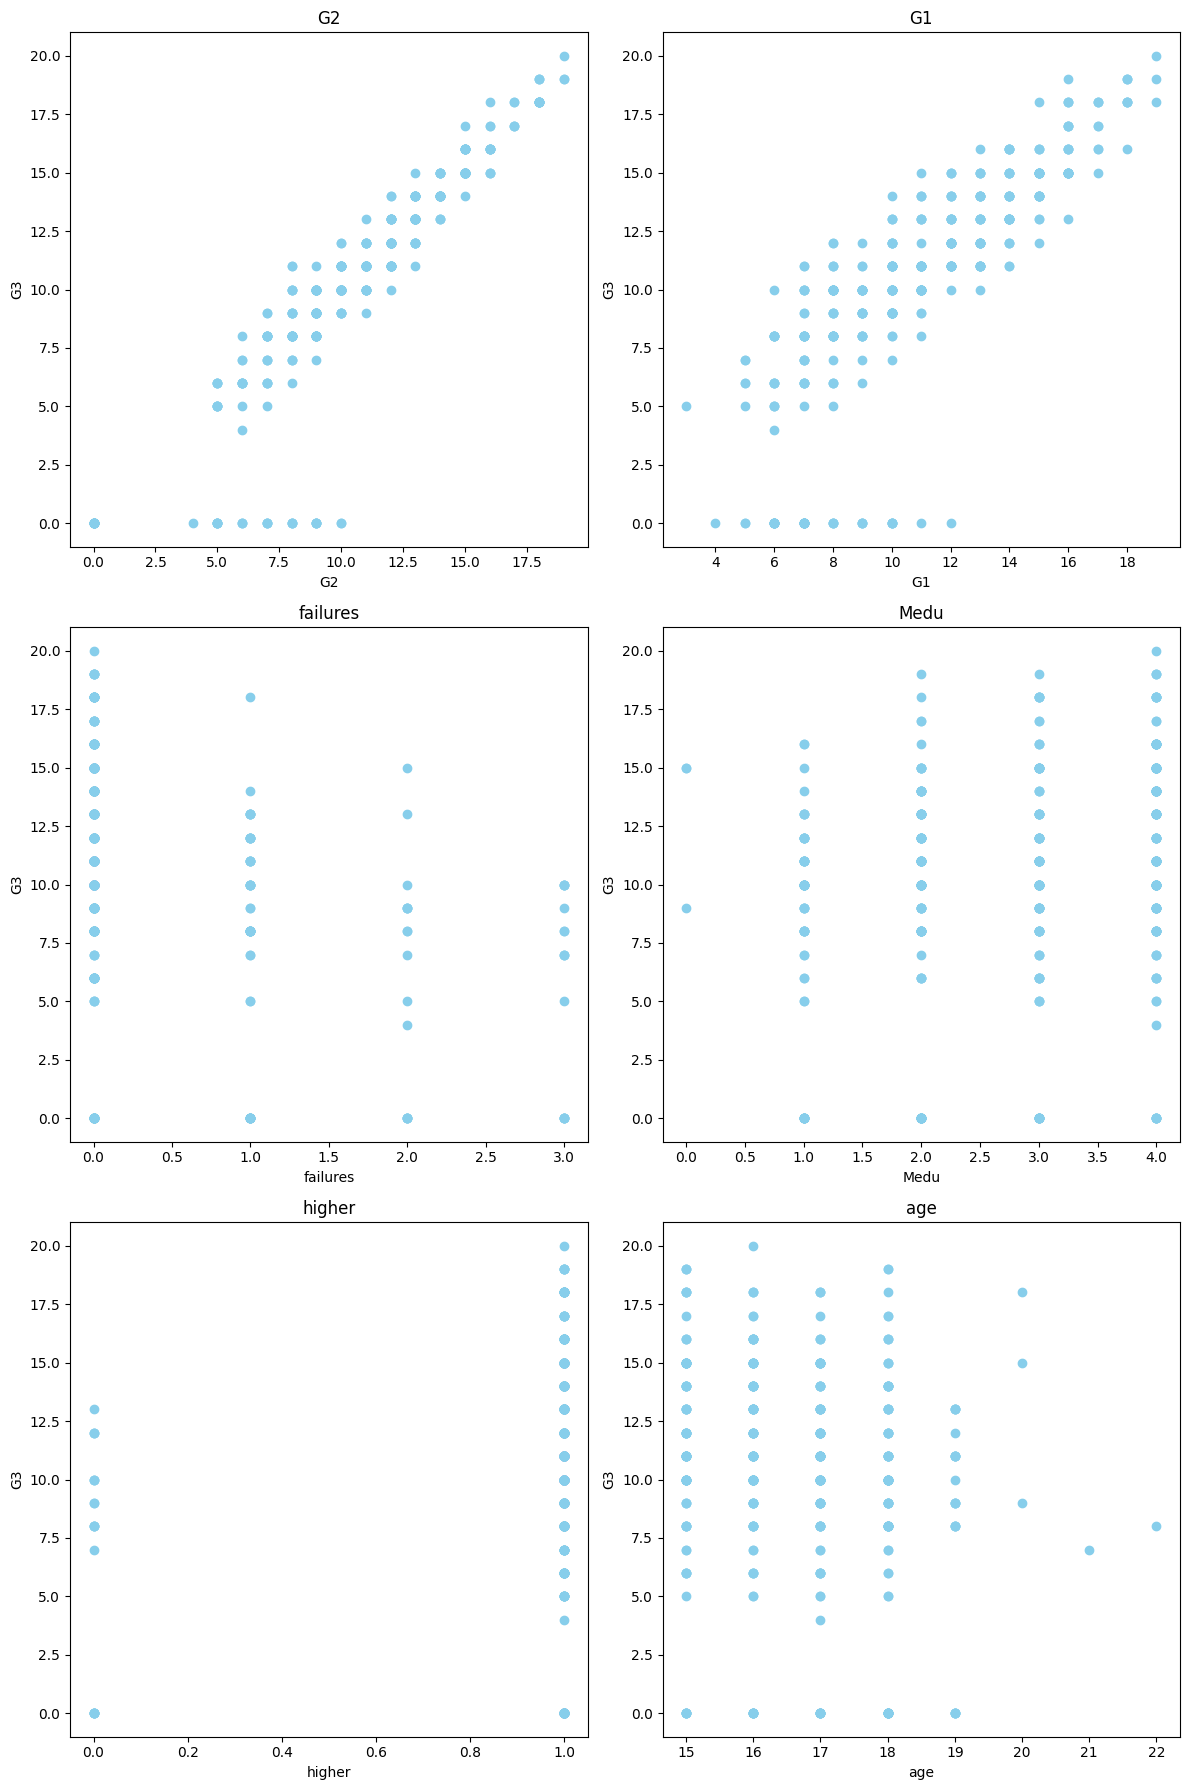

In [30]:
# plot the scatter plot graphs now

plt.figure(figsize=(12, 18))



# First subplot for feature1
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot index 1
plt.scatter(x=data['G2'], y=data['G3'], color='skyblue')
plt.title('G2')
plt.xlabel('G2')
plt.ylabel('G3')

# Second subplot for feature2
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot index 2
plt.scatter(x=data['G1'], y=data['G3'], color='skyblue')
plt.title('G1')
plt.xlabel('G1')
plt.ylabel('G3')

# Third subplot for feature3
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot index 3
plt.scatter(x=data['failures'], y=data['G3'], color='skyblue')
plt.title('failures')
plt.xlabel('failures')
plt.ylabel('G3')

# Fourth subplot for feature4
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot index 4
plt.scatter(x=data['Medu'], y=data['G3'], color='skyblue')
plt.title('Medu')
plt.xlabel('Medu')
plt.ylabel('G3')

# Fifth subplot for feature5
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot index 5
plt.scatter(x=data['higher'], y=data['G3'], color='skyblue')
plt.title('higher')
plt.xlabel('higher')
plt.ylabel('G3')

# Sixth subplot for feature6
plt.subplot(3, 2, 6)  # 3 rows, 2 columns, subplot index 6
plt.scatter(x=data['age'], y=data['G3'], color='skyblue')
plt.title('age')
plt.xlabel('age')
plt.ylabel('G3')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### Select attributes with lowest correlation to target variable

**And drop them from the data frame**

In [31]:
lowest_k_features = correlations.abs().nsmallest(15)

print(lowest_k_features)

freetime      0.011307
absences      0.034247
famrel        0.051363
Walc          0.051939
Dalc          0.054660
health        0.061335
studytime     0.097820
traveltime    0.117142
goout         0.132791
Fedu          0.152457
age           0.161579
Medu          0.217147
failures      0.360415
G1            0.801468
G2            0.904868
dtype: float64


**Now Drop those columns**

In [33]:
data = data.drop(columns=['freetime', 'absences', 'famrel',
                             'Walc', 'Dalc', 'health',]).copy()

# new_data.to_csv('data_before_scaling.csv', index=False)
# new_data

KeyError: "['freetime', 'absences', 'famrel', 'Walc', 'Dalc', 'health'] not found in axis"

In [34]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  nursery     395 non-null    int64
 18  higher      395 non-null    int64
 19  internet    395 non-null    int64
 20  romantic    395 non-null    int6

## Split Data into X and y features, and then scale it.

### Split data to `X` and `y`

In [35]:
y = data['G3'].copy()
X = data.drop('G3', axis=1).copy()
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,failures,schoolsup,famsup,nursery,higher,internet,romantic,goout,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,1,0,1,1,0,0,4,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,0,1,0,1,1,0,3,5,5
2,0,0,15,1,1,1,1,1,0,2,...,3,1,0,1,1,1,0,2,7,8
3,0,0,15,1,0,1,4,2,1,3,...,0,0,1,1,1,1,1,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,0,1,1,1,0,0,2,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,2,0,1,1,1,0,0,4,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,0,0,0,1,1,0,5,14,16
392,1,1,21,0,0,1,1,1,2,2,...,3,0,0,0,1,0,0,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,0,0,0,1,1,0,1,11,12


In [36]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'frequency')

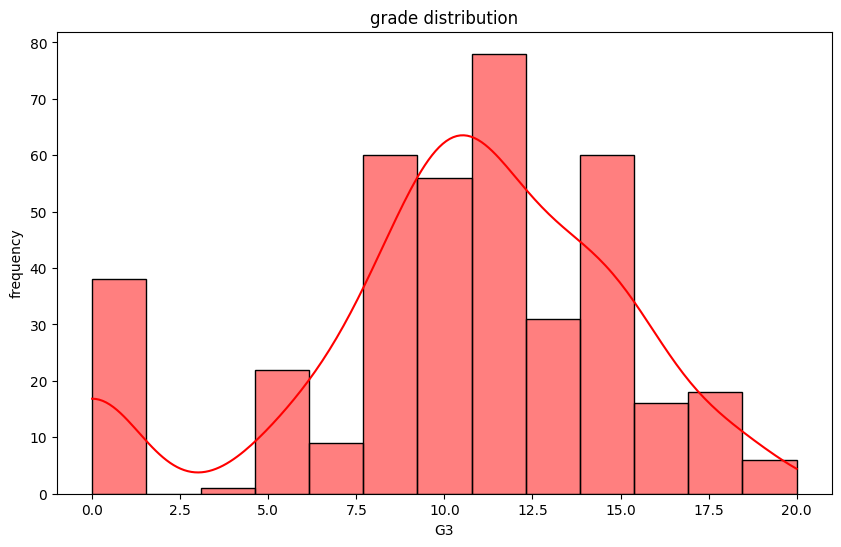

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='red')
plt.title('grade distribution')
plt.xlabel('G3')
plt.ylabel('frequency')

## Scale the data 
Scaling the data gives it each column in `X` a mean of 0 and standard deviation of 1

we'll use Scaler from sklearn

In [38]:
print(f" x mean: {X.mean()}, x standard deviation: {X.std()}")


 x mean: school         0.116456
sex            0.473418
age           16.696203
address        0.777215
famsize        0.288608
Pstatus        0.896203
Medu           2.749367
Fedu           2.521519
Mjob           2.169620
Fjob           2.281013
reason         1.255696
guardian       0.853165
traveltime     1.448101
studytime      2.035443
failures       0.334177
schoolsup      0.129114
famsup         0.612658
nursery        0.794937
higher         0.949367
internet       0.832911
romantic       0.334177
goout          3.108861
G1            10.908861
G2            10.713924
dtype: float64, x standard deviation: school        0.321177
sex           0.499926
age           1.276043
address       0.416643
famsize       0.453690
Pstatus       0.305384
Medu          1.094735
Fedu          1.088201
Mjob          1.227473
Fjob          0.863542
reason        1.208236
guardian      0.536684
traveltime    0.697505
studytime     0.839240
failures      0.743651
schoolsup     0.335751
famsup   

In [39]:
print(f" y mean: {y.mean()}, y standard deviation: {y.std()}")

 y mean: 10.415189873417722, y standard deviation: 4.5814426109978434


In [40]:
X.shape

(395, 24)

In [41]:
y.shape

(395,)

In [42]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

In [43]:
X.shape

(395, 24)

In [44]:
y.shape

(395,)

## **Split Data into training and testing, with 80%**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=41, shuffle=True)

In [46]:
X_train.shape


# X_train_arr = X_train.values
# type(X_train_arr)

(316, 24)

In [47]:
y_train.shape

(316,)

## **Training PyTorch Model**

Our data has 24 columns, so our model's first layer would have 24 input nodes.

Let's have 2 hidden layers with 36 nodes, 1 more hidden layer with 12 nodes, and 1 output layer.

In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(24, 24)
        # 17 inputs and 17 outputs
        self.layer2 = nn.Linear(24, 36)
        #  17 inputs and 8 outputs
        self.layer3 = nn.Linear(36, 24)
        self.layer4 = nn.Linear(24, 12)
        self.output = nn.Linear(12, 1)
        
    # define feed-forward function
    # it takes a feature vector
    def forward(self, x):
        # we use F from the functional package
        # we use it to pass relu function to the layers
        # now hidden layers have RELU activation function
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
#         x = self.dropout(x)
        x = self.output(x)
        return x

### Tweaking a little bit:

- initialize custom weights
- gradient clipping

gradient clipping will be done later, during training stage.

In [49]:
# initialize weights
# def init_weights(m):
#     if type(m) == nn.Linear:
#         torch.nn.init.xavier_uniform_(m.weight)
#         m.bias.data.fill_(0.01)

# neuralNet.apply(init_weights)


## Let's visualize our model:
let's see the parameter sizes of each layer

In [50]:
neuralNet = NeuralNetwork()

param_list = list(neuralNet.parameters())

for i in range(len(param_list)):
    print(param_list[i].shape)

torch.Size([24, 24])
torch.Size([24])
torch.Size([36, 24])
torch.Size([36])
torch.Size([24, 36])
torch.Size([24])
torch.Size([12, 24])
torch.Size([12])
torch.Size([1, 12])
torch.Size([1])


## **Convert the X and y datas into Tensors**

In [51]:
# X_train_array = X_train.values
# X_test_array = X_test.values

# Convert NumPy array to PyTorch tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert y_train and y_test to NumPy arrays and then to PyTorch tensors
y_train_array = np.array(y_train)
y_test_array = np.array(y_test)

y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32).reshape(-1, 1)
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32).reshape(-1, 1)

In [52]:
X_train_tensor

tensor([[-0.3630,  1.0547, -0.5463,  ..., -0.0979, -1.1791, -0.1900],
        [-0.3630, -0.9482,  0.2384,  ..., -0.0979,  0.9325,  0.8747],
        [-0.3630, -0.9482, -1.3310,  ..., -0.0979,  1.5358,  1.1409],
        ...,
        [-0.3630,  1.0547, -0.5463,  ..., -0.9973,  0.6308,  0.3423],
        [-0.3630, -0.9482,  0.2384,  ..., -0.9973,  0.0275, -0.4562],
        [-0.3630,  1.0547, -1.3310,  ..., -0.9973, -0.2742,  0.3423]])

In [53]:
y_train_tensor

tensor([[-0.0906],
        [ 0.7825],
        [ 1.0007],
        [-0.7454],
        [-0.5272],
        [ 1.0007],
        [-0.9637],
        [-0.9637],
        [-0.3089],
        [-0.3089],
        [ 1.2190],
        [ 1.6556],
        [-2.2733],
        [ 1.4373],
        [ 0.3459],
        [-2.2733],
        [ 0.1276],
        [-1.1820],
        [-1.1820],
        [-0.5272],
        [ 0.7825],
        [ 1.0007],
        [-0.3089],
        [-0.0906],
        [ 1.0007],
        [ 1.0007],
        [-0.9637],
        [ 0.1276],
        [ 0.5642],
        [-2.2733],
        [-0.0906],
        [-0.5272],
        [-0.5272],
        [ 0.1276],
        [-0.5272],
        [-2.2733],
        [ 0.5642],
        [ 1.0007],
        [ 0.3459],
        [ 0.3459],
        [ 1.0007],
        [ 1.6556],
        [-0.0906],
        [-0.5272],
        [-0.3089],
        [ 0.5642],
        [ 0.7825],
        [ 0.7825],
        [-0.0906],
        [-0.0906],
        [-2.2733],
        [-0.0906],
        [ 0.

In [54]:
X_test_tensor

tensor([[ 2.7544, -0.9482,  1.0230,  ..., -0.9973,  0.9325,  0.3423],
        [-0.3630, -0.9482, -0.5463,  ..., -0.9973,  0.3292,  0.6085],
        [-0.3630, -0.9482, -0.5463,  ..., -0.9973, -1.4808, -0.4562],
        ...,
        [-0.3630,  1.0547, -1.3310,  ..., -0.9973,  0.3292,  0.3423],
        [-0.3630, -0.9482, -1.3310,  ..., -0.9973,  1.2341,  0.8747],
        [-0.3630, -0.9482, -0.5463,  ..., -0.9973, -2.0841, -2.8519]])

In [55]:
y_test_tensor

tensor([[ 0.1276],
        [ 0.3459],
        [-0.5272],
        [ 0.5642],
        [-2.2733],
        [-0.5272],
        [ 0.3459],
        [ 0.1276],
        [-0.0906],
        [-2.2733],
        [ 1.2190],
        [-0.3089],
        [ 1.0007],
        [-0.3089],
        [-1.4003],
        [ 0.1276],
        [ 1.0007],
        [ 0.5642],
        [ 0.3459],
        [-0.3089],
        [ 1.6556],
        [ 0.7825],
        [-2.2733],
        [ 1.0007],
        [ 0.5642],
        [ 0.1276],
        [ 0.5642],
        [-0.5272],
        [ 1.4373],
        [-0.3089],
        [ 0.1276],
        [-0.9637],
        [ 0.5642],
        [-0.5272],
        [ 0.7825],
        [-0.0906],
        [ 0.5642],
        [-0.9637],
        [ 0.7825],
        [ 0.1276],
        [-0.0906],
        [ 1.0007],
        [-2.2733],
        [ 0.1276],
        [ 0.3459],
        [-0.9637],
        [ 0.3459],
        [-2.2733],
        [ 0.1276],
        [-0.0906],
        [-2.2733],
        [ 1.0007],
        [ 0.

## Gradient Descent (Optimizer) and Loss (criterion) 
We use the `Adam` Optimizer with `MSE` loss function and `0.1` learning rate, and additional weight-decay parameter

In [56]:
optimizer = torch.optim.Adam(neuralNet.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.MSELoss()

## Training the model within 100 epochs

### **First let's define code for training one epoch**

In [57]:
batch_size = 32  # Example batch size, adjust as needed

# Create a DataLoader instance with the specified batch size
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

#X_test_tensor.shape
y_test_tensor.shape


torch.Size([79, 1])

### **Train Loop**

In [58]:
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X)
        loss = loss_function(pred, y)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # make the gradient zero to prevent buildup
        
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:5d}]")


## **Test Loop**

In [59]:
losses = []
accuracies = []
def test_loop(dataloader, model, loss_function):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct, total_predictions = 0, 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            # Calculate MSE loss
            mse_loss = ((pred - y)**2).mean().item()
            #print(f"pred: {pred}")
            #print(f"pred: {y}")
            
            # Count the number of matching values within the batch
            num_matches = torch.sum(torch.round(pred) == torch.round(y)).item()

            print(f"Number of matching values in this batch: {num_matches} out of {len(y)}")
            test_loss += mse_loss

            # Accumulate the number of correct predictions and total predictions
            correct += num_matches
            total_predictions += len(y)

    # Calculate average MSE loss
    test_loss /= len(dataloader.dataset)
    
    losses.append(test_loss)
    # Calculate accuracy percentage
    accuracy_percentage = (correct / total_predictions) * 100
    accuracies.append(accuracy_percentage)
    print(f"Test Error: \n Accuracy: {accuracy_percentage:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return pred


## now train all epochs

In [60]:
num_epochs = 100
predictions = []
best_loss = np.inf
patience = 10
counter = 0


for t in range(num_epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, neuralNet, criterion, optimizer)
    prediction = test_loop(test_dataloader, neuralNet, criterion)
    predictions.append(prediction)
    
    # Check if the test loss has improved
    if losses[-1] < best_loss:
        best_loss = losses[-1]
        counter = 0
    else:
        counter += 1
    
    # If test loss hasn't improved for 'patience' epochs, stop training
    if counter >= patience:
        print("Early stopping!")
        break

Epoch 1
-------------------------------
loss: 1.405950 [   32/  316]
Number of matching values in this batch: 8 out of 32
Number of matching values in this batch: 15 out of 32
Number of matching values in this batch: 7 out of 15
Test Error: 
 Accuracy: 38.0%, Avg loss: 0.042186 

Epoch 2
-------------------------------
loss: 1.087838 [   32/  316]
Number of matching values in this batch: 14 out of 32
Number of matching values in this batch: 8 out of 32
Number of matching values in this batch: 8 out of 15
Test Error: 
 Accuracy: 38.0%, Avg loss: 0.036165 

Epoch 3
-------------------------------
loss: 0.567992 [   32/  316]
Number of matching values in this batch: 13 out of 32
Number of matching values in this batch: 13 out of 32
Number of matching values in this batch: 4 out of 15
Test Error: 
 Accuracy: 38.0%, Avg loss: 0.039302 

Epoch 4
-------------------------------
loss: 0.915290 [   32/  316]
Number of matching values in this batch: 14 out of 32
Number of matching values in this

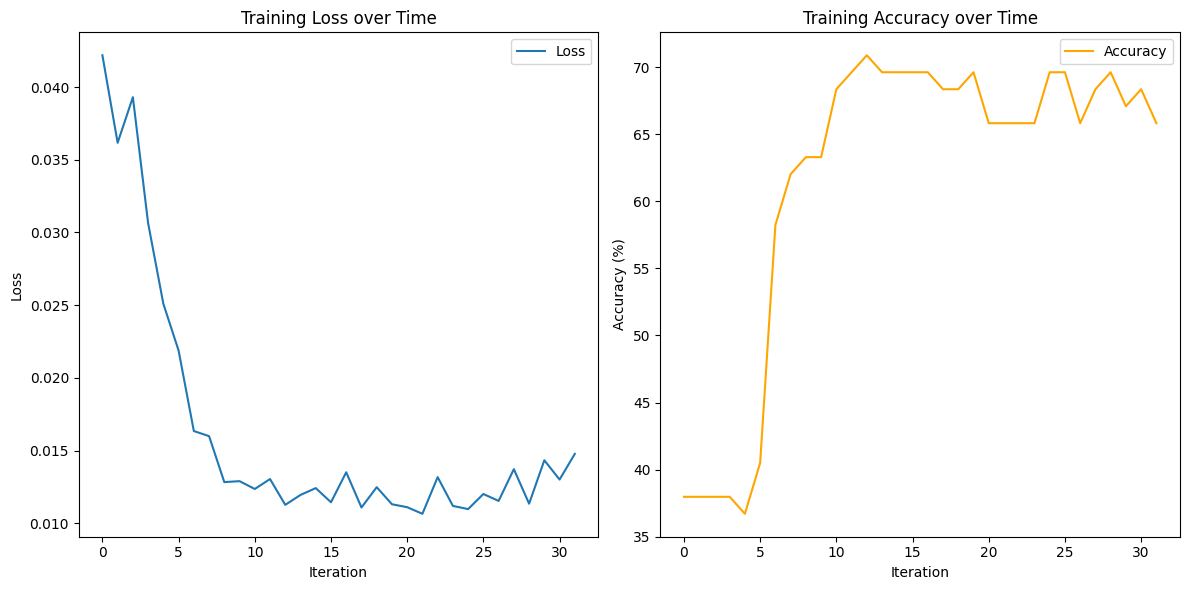

In [61]:
plt.figure(figsize=(12, 6))

# Plot Losses
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.legend()

# Plot Accuracies
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Time')
plt.legend()

plt.tight_layout()
plt.show()

### New data

In [62]:
X.mean()

1.3116558940719149e-17

In [63]:
original_mean = X.mean()
original_std = X.std()

In [64]:
### unseen data

# Mean and standard deviation for each feature
x_mean = original_mean
x_std = original_std
# Number of features
num_features = 24

# Generate random values for each feature based on normal distribution with given mean and standard deviation
unseen_data = {}
for i in range(num_features):
    feature_name = f'Feature_{i+1}'
#     mean = x_mean[i]
#     std = x_std[i]
    value = np.random.normal(x_mean, x_std)
    unseen_data[feature_name] = [value]

# Convert dictionary to DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Display the generated unseen data
print("Unseen Data:")
print(unseen_df)

Unseen Data:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.309032  -0.089433   0.193292  -0.885891  -0.867891   0.238839   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_15  Feature_16  \
0   0.127791   0.258076  -0.134331    0.178232  ...   -1.242001    0.642607   

   Feature_17  Feature_18  Feature_19  Feature_20  Feature_21  Feature_22  \
0    1.001249     0.53832   -0.152793    1.616322    0.820925   -0.423123   

   Feature_23  Feature_24  
0    0.951739     -1.2342  

[1 rows x 24 columns]


Predictions:
[[0.19869651]]


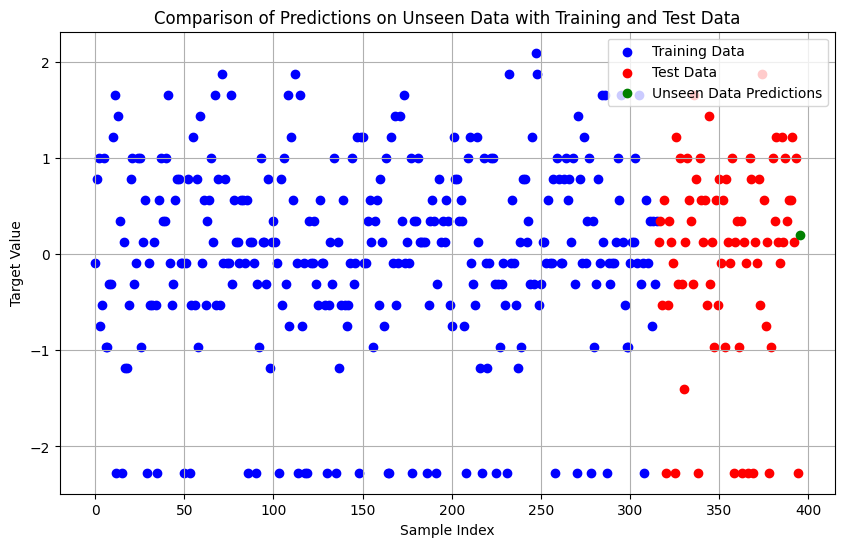

In [65]:
# Scale the unseen data using the same mean and standard deviation values as the training data
unseen_scaled = (unseen_df.values - x_mean) / x_std

# Convert the scaled unseen data to a PyTorch tensor
unseen_tensor = torch.tensor(unseen_scaled, dtype=torch.float32)

# Make predictions using your trained model
with torch.no_grad():
    neuralNet.eval()  # Set the model to evaluation mode
    predictions = neuralNet(unseen_tensor)

# Convert predictions tensor to numpy array
predictions_array = predictions.numpy()

# Display the predictions
print("Predictions:")
print(predictions_array)

# Convert the predictions back to original scale
predictions_unscaled = predictions_array * y.std() + y.mean()

# Plot the actual training and test data along with the predictions
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(range(len(y_train)), y_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(range(len(y_train), len(y_train) + len(y_test)), y_test, color='red', label='Test Data')

# Plot unseen data predictions
plt.scatter(len(y_train) + len(y_test), predictions_unscaled, color='green', label='Unseen Data Predictions')

plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Comparison of Predictions on Unseen Data with Training and Test Data')
plt.legend()
plt.grid(True)
plt.show()

## **Save the model**

In [66]:
torch.save(neuralNet.state_dict(), 'model.pth')


## **Load model**:

In [67]:
model = NeuralNetwork()  # Instantiate your model
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode if needed


NeuralNetwork(
  (layer1): Linear(in_features=24, out_features=24, bias=True)
  (layer2): Linear(in_features=24, out_features=36, bias=True)
  (layer3): Linear(in_features=36, out_features=24, bias=True)
  (layer4): Linear(in_features=24, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=1, bias=True)
)

## **Example new data**

**Look up hash-map for label encoding**

In [68]:
# Define the columns of the dataset after dropping certain columns
columns = non_numeric_columns

# Initialize a dictionary to store the string values of the encoded classes
string_values = {}
class_mappings = {}
le = LabelEncoder()
# Loop through each column and encode its classes
for column in columns:
    original_data[column].unique()
    
    encoded_classes = le.fit_transform(original_data[column])
    original_classes = list(le.classes_)
    class_mappings[column] = {'original_classes': original_classes, 'encoded_classes': encoded_classes}
        
    # Create a dictionary to map encoded classes to original string values
    encoded_to_string = {encoded: original for encoded, original in zip(le.transform(original_classes), original_classes)}
    string_values[column] = encoded_to_string

encoded_vals = {}
# Display the original and string values of the encoded classes for each column
for column, mapping in class_mappings.items():
    print(f"Column: {column}")
    if column in string_values:
        encoded_vals[column] = {encoded: string_values[column][encoded] for encoded in mapping['encoded_classes']}
        print("String values of encoded classes:", {encoded: string_values[column][encoded] for encoded in mapping['encoded_classes']})
    print()
    

Column: sex
String values of encoded classes: {0: 'F', 1: 'M'}

Column: address
String values of encoded classes: {1: 'U', 0: 'R'}

Column: famsup
String values of encoded classes: {0: 'no', 1: 'yes'}

Column: Mjob
String values of encoded classes: {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}

Column: Fjob
String values of encoded classes: {4: 'teacher', 2: 'other', 3: 'services', 1: 'health', 0: 'at_home'}

Column: school
String values of encoded classes: {0: 'GP', 1: 'MS'}

Column: nursery
String values of encoded classes: {1: 'yes', 0: 'no'}

Column: Pstatus
String values of encoded classes: {0: 'A', 1: 'T'}

Column: guardian
String values of encoded classes: {1: 'mother', 0: 'father', 2: 'other'}

Column: famsize
String values of encoded classes: {0: 'GT3', 1: 'LE3'}

Column: schoolsup
String values of encoded classes: {1: 'yes', 0: 'no'}

Column: reason
String values of encoded classes: {0: 'course', 2: 'other', 1: 'home', 3: 'reputation'}

Column: higher
S

In [69]:
reverse_encoded_vals = {}

for column, mapping in encoded_vals.items():
    reverse_encoded_vals[column] = {v: k for k, v in mapping.items()}

# Display the reverse encoded values
reverse_encoded_vals

 

{'sex': {'F': 0, 'M': 1},
 'address': {'U': 1, 'R': 0},
 'famsup': {'no': 0, 'yes': 1},
 'Mjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
 'Fjob': {'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0},
 'school': {'GP': 0, 'MS': 1},
 'nursery': {'yes': 1, 'no': 0},
 'Pstatus': {'A': 0, 'T': 1},
 'guardian': {'mother': 1, 'father': 0, 'other': 2},
 'famsize': {'GT3': 0, 'LE3': 1},
 'schoolsup': {'yes': 1, 'no': 0},
 'reason': {'course': 0, 'other': 2, 'home': 1, 'reputation': 3},
 'higher': {'yes': 1, 'no': 0},
 'internet': {'no': 0, 'yes': 1},
 'romantic': {'no': 0, 'yes': 1}}

In [71]:
x = input('give me: ')
y = reverse_encoded_vals['sex'][x]
y

give me:  F


0

In [72]:
data_ranges

{'age': {'max': 22, 'min': 15},
 'Medu': {'max': 4, 'min': 0},
 'Fedu': {'max': 4, 'min': 0},
 'traveltime': {'max': 4, 'min': 1},
 'studytime': {'max': 4, 'min': 1},
 'failures': {'max': 3, 'min': 0},
 'famrel': {'max': 5, 'min': 1},
 'freetime': {'max': 5, 'min': 1},
 'goout': {'max': 5, 'min': 1},
 'Dalc': {'max': 5, 'min': 1},
 'Walc': {'max': 5, 'min': 1},
 'health': {'max': 5, 'min': 1},
 'absences': {'max': 75, 'min': 0},
 'G1': {'max': 19, 'min': 3},
 'G2': {'max': 19, 'min': 0},
 'G3': {'max': 20, 'min': 0}}

In [75]:
# Define the columns of the dataset
og_data_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'nursery', 'higher', 'internet',
       'romantic', 'goout', 'G1', 'G2']

# # Define the mean and standard deviation of the original data

# Mean values for each feature
mean_data = {
    'school': 0.116456,
    'sex': 0.473418,
    'age': 16.696203,
    'address': 0.777215,
    'famsize': 0.288608,
    'Pstatus': 0.896203,
    'Medu': 2.749367,
    'Fedu': 2.521519,
    'Mjob': 2.169620,
    'Fjob': 2.281013,
    'reason': 1.255696,
    'guardian': 0.853165,
    'traveltime': 1.448101,
    'studytime': 2.035443,
    'failures': 0.334177,
    'schoolsup': 0.129114,
    'famsup': 0.612658,
    'nursery': 0.794937,
    'higher': 0.949367,
    'internet': 0.832911,
    'romantic': 0.334177,
    'goout': 3.108861,
    'G1': 10.908861,
    'G2': 10.713924
}

# Standard deviation values for each feature
std_data = {
    'school': 0.321177,
    'sex': 0.499926,
    'age': 1.276043,
    'address': 0.416643,
    'famsize': 0.453690,
    'Pstatus': 0.305384,
    'Medu': 1.094735,
    'Fedu': 1.088201,
    'Mjob': 1.227473,
    'Fjob': 0.863542,
    'reason': 1.208236,
    'guardian': 0.536684,
    'traveltime': 0.697505,
    'studytime': 0.839240,
    'failures': 0.743651,
    'schoolsup': 0.335751,
    'famsup': 0.487761,
    'nursery': 0.404260,
    'higher': 0.219525,
    'internet': 0.373528,
    'romantic': 0.472300,
    'goout': 1.113278,
    'G1': 3.319195,
    'G2': 3.761505
}

# Create pandas Series
x_mean_original = pd.Series(mean_data)
x_std_original = pd.Series(std_data)

# Display the Series
print("x_mean_original:")
print(x_mean_original)
print("\nx_std_original:")
print(x_std_original)


# # Load the label encoded data
# # data = pd.read_csv('your_label_encoded_data.csv')  # Replace with your file path

# # Define a function to reverse the label encoding
def reverse_label_encoding(label, column):
    le = LabelEncoder()
    le.fit(data[column])
    return le.inverse_transform([label])[0]

# # Prompt the user to enter new data
new_data = {}
# commenting out the input fields
# for column in og_data_columns:
#     if column in non_numeric_columns:
#         input_val = input(f"Enter the value for {column}: ")
#         new_data[column] = reverse_encoded_vals[column][input_val]
#     else:
#         value = float(input(f"Enter the value for {column}: "))
#         value = (value - x_mean_original[column]) / x_std_original[column]
#         new_data[column] = value

# # Convert the new data to a DataFrame
# new_data_df = pd.DataFrame([new_data])

# # # Reverse the standardization
# for column in columns:
#     new_data_df[column] = (new_data_df[column] * original_std[column]) + original_mean[column]


# # Print the new data
# print("\nNew data:")
# print(new_data_df)

# # Now you can use the new data to make predictions using your model


x_mean_original:
school         0.116456
sex            0.473418
age           16.696203
address        0.777215
famsize        0.288608
Pstatus        0.896203
Medu           2.749367
Fedu           2.521519
Mjob           2.169620
Fjob           2.281013
reason         1.255696
guardian       0.853165
traveltime     1.448101
studytime      2.035443
failures       0.334177
schoolsup      0.129114
famsup         0.612658
nursery        0.794937
higher         0.949367
internet       0.832911
romantic       0.334177
goout          3.108861
G1            10.908861
G2            10.713924
dtype: float64

x_std_original:
school        0.321177
sex           0.499926
age           1.276043
address       0.416643
famsize       0.453690
Pstatus       0.305384
Medu          1.094735
Fedu          1.088201
Mjob          1.227473
Fjob          0.863542
reason        1.208236
guardian      0.536684
traveltime    0.697505
studytime     0.839240
failures      0.743651
schoolsup     0.335751
famsup 

# Define the mean and standard deviation of the original data


In [76]:
original_mean = X.mean()
original_std = X.std()


In [77]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   address     395 non-null    int64
 4   famsize     395 non-null    int64
 5   Pstatus     395 non-null    int64
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int64
 9   Fjob        395 non-null    int64
 10  reason      395 non-null    int64
 11  guardian    395 non-null    int64
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int64
 16  famsup      395 non-null    int64
 17  nursery     395 non-null    int64
 18  higher      395 non-null    int64
 19  internet    395 non-null    int64
 20  romantic    395 non-null    int6